In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data = pd.read_csv("UpdatedResumeDataSet.csv")
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
data.shape

(962, 2)

In [4]:
data.isna().sum()

Category    0
Resume      0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(796)

In [7]:
data["Category"].value_counts().reset_index()

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Sales,40
8,Data Science,40
9,Mechanical Engineer,40


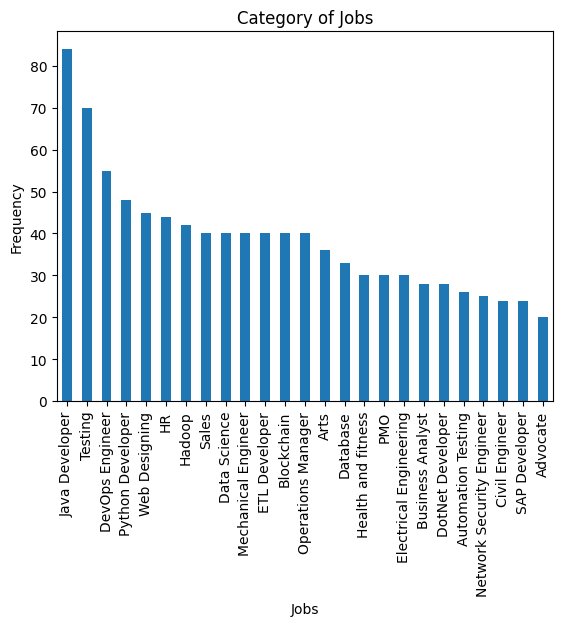

In [9]:
data["Category"].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Category of Jobs")
plt.xlabel("Jobs")
plt.ylabel("Frequency")
plt.show()

In [11]:
data["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning Data

URLS 

HASTAGS

MENTIONS 

SPECIAL LETTERS

PUNCTUATIONS


In [36]:
import re  # to clean the data by removing unwanted text

def cleanResume(txt):
    cleanTxt = re.sub(r"http\S+\s*", "", txt)            # Remove URLs
    cleanTxt = re.sub(r"@\S+", "", cleanTxt)             # Remove @mentions
    cleanTxt = re.sub(r"#\S+", "", cleanTxt)             # Remove hashtags
    cleanTxt = re.sub(r"RT|cc", "", cleanTxt)            # Remove RT and cc
    cleanTxt = re.sub(r"[{}]".format(re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")), " ", cleanTxt)  # Remove punctuations
    cleanTxt = re.sub(r"[^\x00-\x7f]","",cleanTxt)
    cleanTxt = re.sub(r"\s+", " ", cleanTxt)             # Replace multiple spaces with one
    return cleanTxt


<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:8: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Hp\AppData\Local\Temp\ipykernel_11348\564740400.py:8: SyntaxWarning: invalid escape sequence '\]'
  cleanTxt = re.sub(r"[{}]".format(re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~""")), " ", cleanTxt)  # Remove punctuations


In [37]:
cleanResume("My website link is https:\\Helloworld and it is booming")

'My website link is and it is booming'

In [38]:
cleanResume("My website link is https:\\Helloworld and it is booming @more than ever")

'My website link is and it is booming than ever'

In [39]:
cleanResume("My website link is https:\\Helloworld and it is booming @more than ever ######")

'My website link is and it is booming than ever '

In [40]:
cleanResume("My website link is  https:\\Helloworld and it is booming @more than ever ######")

'My website link is and it is booming than ever '

In [41]:
data["Resume"] = data["Resume"].apply(lambda x:cleanResume(x))

In [42]:
data["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Nave Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in aelerating the re

In [43]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [76]:
data["Category"] = lb.fit_transform(data["Category"])
data["Category"]

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int64

# Vectorization

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

In [53]:
required_txt = tfidf.fit_transform(data["Resume"]) # This converts all the rows in Resume into vectors


# Splitting of data

In [58]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(required_txt,data["Category"] , test_size=0.2)

# Model Training

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier()) # to imporove for multiclass
clf.fit(x_train , y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [67]:
ypredict = clf.predict(x_test)

In [68]:
ypredict

array([11, 22, 15,  5, 20, 15,  3, 22, 11,  3,  5, 23, 15,  3,  5, 13, 10,
       17,  2, 10, 13, 11,  8,  7,  8,  8,  6, 19,  2, 18, 12,  1,  5, 19,
        3, 16, 16, 11, 15, 19, 14, 18, 23, 15, 16, 24, 18, 12,  4, 17, 13,
        6,  5,  6, 18, 24, 23, 17, 23, 14, 11, 15,  3,  9, 11,  7, 14, 20,
        1, 21,  2, 21, 22, 15, 20,  1, 19,  5, 23, 15, 18, 22, 22, 13, 11,
       20, 11,  1, 15, 15, 24, 13,  2, 14, 21, 23, 22,  3,  9,  3, 15, 13,
       16, 16,  6, 10, 14, 12,  7, 15, 20, 23,  7, 22, 14, 24,  6,  7, 16,
       24, 22,  9, 20,  8, 12, 17, 11, 23, 11,  9, 20,  3, 18, 24, 15, 18,
        2,  4,  5, 24,  1,  6, 19, 14, 13, 22,  8, 15, 13,  5, 10, 22, 14,
       23,  7,  5, 15, 10, 22,  7,  6, 24, 13, 18, 24, 18,  3, 15, 14, 23,
        5,  1, 13, 15, 13, 18,  7,  7, 15,  4,  3,  8,  3, 14, 15, 10,  9,
       13,  3, 24, 20, 21,  3])

In [69]:
accuracy_score(y_test , ypredict)

1.0

# Prediction Model

In [78]:
import pickle
pickle.dump(tfidf , open("tfidf.pkl","wb"))  #wb = write binary : the file will be in binary mode
pickle.dump(clf , open("clf.pkl","wb"))
pickle.dump(lb,open("lb.pkl","wb"))

In [72]:
my_resume = 'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js'

In [73]:
import pickle
cleaned_resume  = cleanResume(my_resume)
input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]
prediction_id

np.int64(6)

# Creating a Website For Resume Screening
